In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.- Recopilación de Datos

Este dataset lo saque de aqui: https://www.kaggle.com/datasets/uciml/iris

In [2]:
df = pd.read_csv('../Datasets/Iris_class.csv')

## 2.- Exploración y Análisis de Datos

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


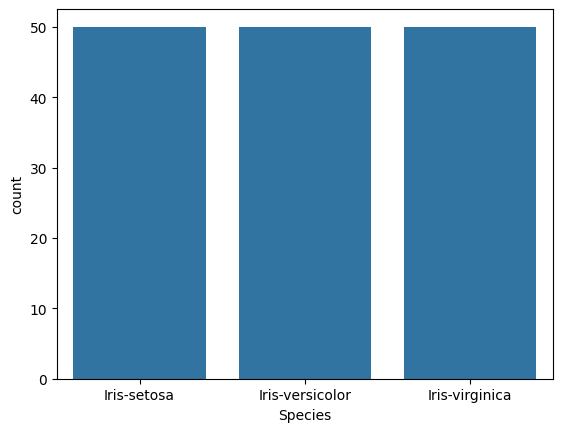

In [6]:
sns.countplot(x='Species', data=df)
plt.show()

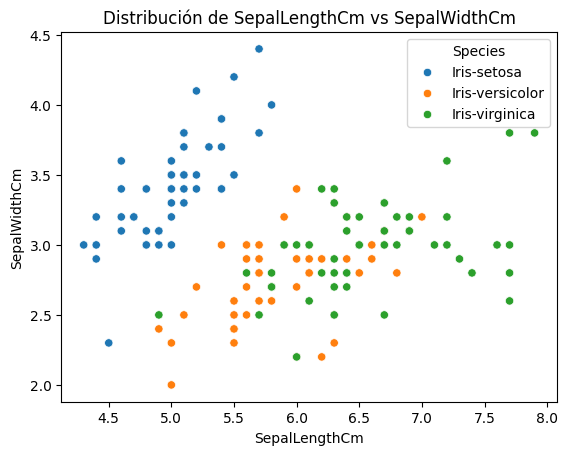

In [7]:
# Visualizar la dispersión de las características SepalLengthCm y SepalWidthCm
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Distribución de SepalLengthCm vs SepalWidthCm')
plt.show()

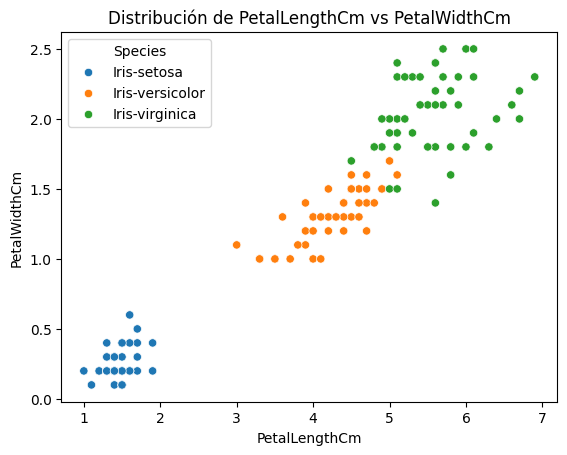

In [8]:
# Visualizar la dispersión de las características PetalLengthCm y PetalWidthCm
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Distribución de PetalLengthCm vs PetalWidthCm')
plt.show()

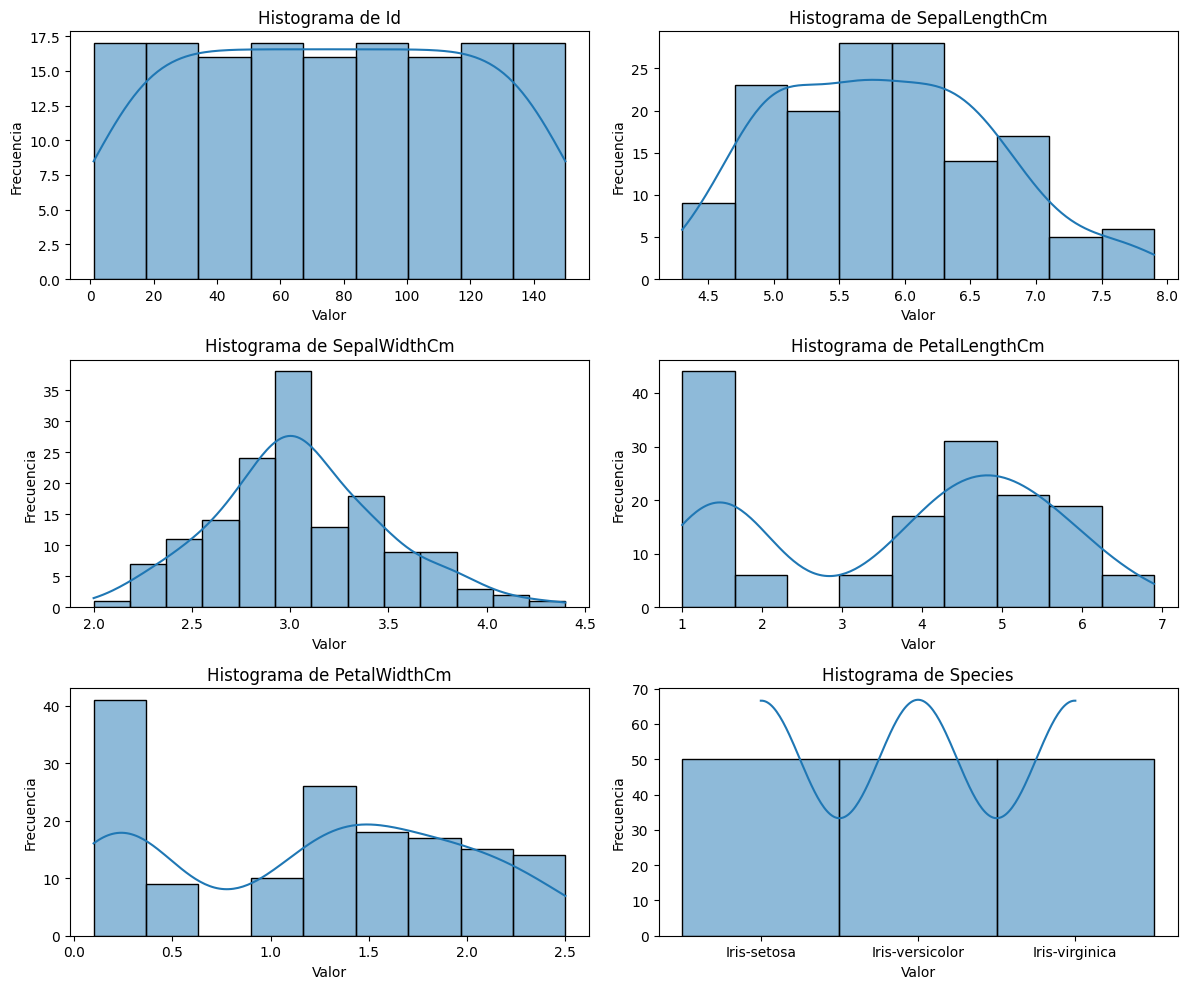

In [9]:
# Obtener una lista de nombres de columnas en tu DataFrame
columnas = df.columns

# Calcular el número de filas y columnas para los subplots
num_filas = (len(columnas) + 1) // 2  # Para asegurar suficiente espacio en caso de un número impar de columnas
num_columnas = 2

# Crear una figura y subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 10))

# Aplanar el arreglo de subplots para facilitar el índice
axs = axs.flatten()

# Iterar sobre las columnas y trazar una visualización para cada una
for i, columna in enumerate(columnas):
    sns.histplot(data=df, x=columna, kde=True, ax=axs[i])
    axs[i].set_title(f'His: {columna}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

# Ocultar los subplots que no se utilizan
for j in range(len(columnas), len(axs)):
    axs[j].axis('off')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [10]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## 3.- División de Datos

In [11]:
x = df.drop('Species', axis=1)
y = df['Species']

In [12]:
y = pd.factorize(df['Species'])[0]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## 4.- Preprocesamiento de datos

In [14]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Definimos las columnas numéricas y categóricas para cada
numeric_features = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# Creamos transformers para imputación y escala
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creamos transformer para codificación de variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creamos un preprocesador que aplique los transformers apropiados a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creamos el pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [15]:
x_train_prep = pipeline.fit_transform(x_train)
x_test_prep = pipeline.transform(x_test)

In [16]:
x_train = pd.DataFrame(x_train_prep, columns=list(pd.get_dummies(x_train)), index=x_train.index)

In [17]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,-1.551640,-1.721568,-0.324840,-1.347036,-1.320168
106,0.729841,-1.124492,-1.226129,0.414290,0.651867
76,0.031429,1.144395,-0.550162,0.584741,0.257460
9,-1.528359,-1.124492,0.125805,-1.290219,-1.451638
89,0.334074,-0.408002,-1.226129,0.130206,0.125991


In [18]:
x_test = pd.DataFrame(x_test_prep, columns=list(pd.get_dummies(x_test)), index=x_test.index)

In [19]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
38,-0.853227,-1.721568,-0.099517,-1.403853,-1.320168
127,1.218730,0.308489,-0.099517,0.641558,0.783336
57,-0.410899,-1.124492,-1.451452,-0.267513,-0.268416
93,0.427196,-1.005077,-1.676774,-0.267513,-0.268416
42,-0.760106,-1.721568,0.351127,-1.403853,-1.320168


## 5.- Entrenamiento

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)

In [21]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [22]:
# Entrenamos un modelo SVM con kernel gaussiano
svm_gaussiano = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_gaussiano.fit(x_train, y_train)


SVC(random_state=42)

## 6.- Evaluación

In [23]:
y_pred = svm.predict(x_test)

In [24]:
y_pred[0:5]

array([0, 2, 1, 1, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

Matriz de Confusión:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [27]:
from sklearn.metrics import accuracy_score

# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


In [28]:
from sklearn.metrics import recall_score
# Calculamos el recall
recall = recall_score(y_test, y_pred, average='weighted')  

print("Recall del modelo:", recall)

Recall del modelo: 1.0


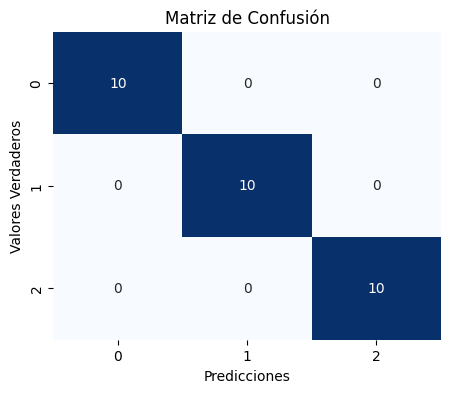

In [29]:
# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [30]:
y_pred_gaussiano = svm_gaussiano.predict(x_test)

In [31]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_gaussiano, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 1.00
